<a href="https://colab.research.google.com/github/dafeng097/info5731/blob/master/Word_Embeddingand_LSTM_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/wshuyi/info-5731-public/raw/master/yelp-polarity-middle-size.pickle

--2019-04-09 19:53:54--  https://github.com/wshuyi/info-5731-public/raw/master/yelp-polarity-middle-size.pickle
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wshuyi/info-5731-public/master/yelp-polarity-middle-size.pickle [following]
--2019-04-09 19:53:54--  https://raw.githubusercontent.com/wshuyi/info-5731-public/master/yelp-polarity-middle-size.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16174268 (15M) [application/octet-stream]
Saving to: ‘yelp-polarity-middle-size.pickle’

yelp-polarity-middl 100%[===================>]  15.42M   101MB/s    in 0.2s    

2019-04-09

In [0]:
import pickle

In [0]:
import pandas as pd

In [0]:
with open("yelp-polarity-middle-size.pickle", 'rb') as f:
  train, valid, test = pickle.load(f)

In [6]:
train.head()

,sentiment,text
0,0,"If you're leaving Vegas, know that this is the..."
1,1,We were hungry and so quick bites of pizzas sa...
2,0,I have been calling around to various bakeries...
3,0,"The first few visits here, we enjoyed it. The ..."
4,0,"Horrible service, menus never provided. Had to..."


In [7]:
train.shape

(16000, 2)

In [8]:
test.shape

(2000, 2)

In [9]:
valid.shape

(4000, 2)

In [14]:
train[train.sentiment == 1].shape

(8000, 2)

In [0]:
import matplotlib.pyplot as plt

In [0]:
y  = ["positive", "negative"]

x_positive = train[train.sentiment == 1].shape[0]


In [0]:
x_negative = train[train.sentiment == 0].shape[0]

In [0]:
number = [x_positive, x_negative]

<BarContainer object of 2 artists>

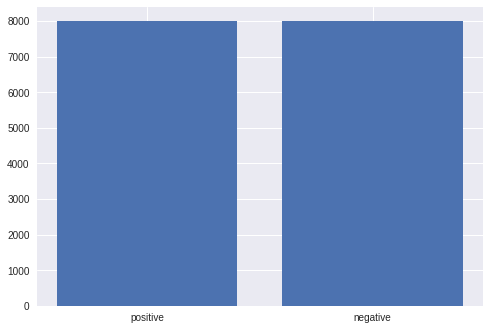

In [31]:
plt.bar(y,number)

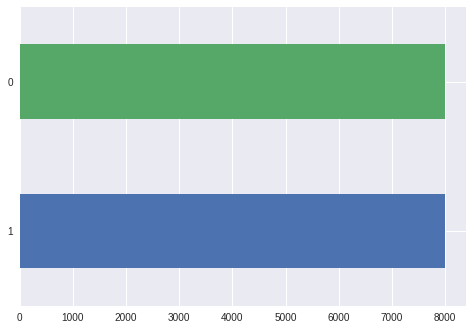

In [103]:
train.sentiment.value_counts().plot(kind='barh')

In [0]:
from keras.preprocessing.text import Tokenizer

In [0]:
from keras.preprocessing.sequence import pad_sequences

In [0]:
import numpy as np

In [0]:
num_words = 10000

In [0]:
tokenizer = Tokenizer(num_words=num_words)





In [0]:
tokenizer.fit_on_texts(train.text)

In [0]:
train_sequences = tokenizer.texts_to_sequences(train.text)
vaild_sequences = tokenizer.texts_to_sequences(valid.text)
test_sequences = tokenizer.texts_to_sequences(test.text)


In [51]:
train.text[0]

"If you're leaving Vegas, know that this is the very last time you will have to shell out an ungodly amount of money for pure crap. \\n\\nWe just wanted a nice refreshing soda with ice and a straw to sooth our yucky tummies. Little did I know that two small sodas would cost $6.25. \\n\\n$6.25!!!!!!!\\n\\nWhat a gigantic rip off. Complete usuary. Eff you, BK."

In [52]:
# words frequency
train_sequences[0]

[40,
 240,
 948,
 137,
 112,
 13,
 16,
 11,
 1,
 44,
 184,
 48,
 20,
 65,
 23,
 4,
 2154,
 36,
 59,
 549,
 7,
 260,
 9,
 2724,
 1149,
 12,
 259,
 39,
 190,
 5,
 89,
 1997,
 1374,
 18,
 457,
 2,
 5,
 3561,
 4,
 42,
 5756,
 111,
 92,
 3,
 112,
 13,
 121,
 201,
 3500,
 53,
 640,
 375,
 686,
 12,
 12,
 375,
 686,
 12,
 1550,
 5,
 4173,
 1998,
 110,
 1040,
 7344,
 20,
 6413]

In [53]:
tokenizer.index_word

{1: 'the',
 2: 'and',
 3: 'i',
 4: 'to',
 5: 'a',
 6: 'was',
 7: 'of',
 8: 'it',
 9: 'for',
 10: 'in',
 11: 'is',
 12: 'n',
 13: 'that',
 14: 'my',
 15: 'we',
 16: 'this',
 17: 'but',
 18: 'with',
 19: 'they',
 20: 'you',
 21: 'on',
 22: 'not',
 23: 'have',
 24: 'had',
 25: 'at',
 26: 'were',
 27: 'so',
 28: 'place',
 29: 'are',
 30: 'food',
 31: 'be',
 32: 'there',
 33: 'good',
 34: 'me',
 35: 'as',
 36: 'out',
 37: 'all',
 38: 'like',
 39: 'just',
 40: 'if',
 41: 'get',
 42: 'our',
 43: 'one',
 44: 'very',
 45: 'here',
 46: 'up',
 47: 'when',
 48: 'time',
 49: 'great',
 50: 'from',
 51: 'service',
 52: 'or',
 53: 'would',
 54: 'their',
 55: 'back',
 56: 'about',
 57: 'go',
 58: 'no',
 59: 'an',
 60: 'what',
 61: 'she',
 62: "it's",
 63: 'really',
 64: 'he',
 65: 'will',
 66: 'us',
 67: 'which',
 68: 'only',
 69: 'some',
 70: 'your',
 71: 'been',
 72: 'because',
 73: 'more',
 74: 'can',
 75: 'even',
 76: 'them',
 77: 'by',
 78: 'got',
 79: "don't",
 80: 'other',
 81: 'after',
 82: 'al

In [63]:
list(tokenizer.index_word.items())[:20]

[(1, 'the'),
 (2, 'and'),
 (3, 'i'),
 (4, 'to'),
 (5, 'a'),
 (6, 'was'),
 (7, 'of'),
 (8, 'it'),
 (9, 'for'),
 (10, 'in'),
 (11, 'is'),
 (12, 'n'),
 (13, 'that'),
 (14, 'my'),
 (15, 'we'),
 (16, 'this'),
 (17, 'but'),
 (18, 'with'),
 (19, 'they'),
 (20, 'you')]

In [0]:
lens = [len(seq) for seq in train_sequences]

(array([8197., 4685., 1779.,  710.,  313.,  142.,   79.,   44.,   29.,
          22.]),
 array([  0. ,  98.7, 197.4, 296.1, 394.8, 493.5, 592.2, 690.9, 789.6,
        888.3, 987. ]),
 <a list of 10 Patch objects>)

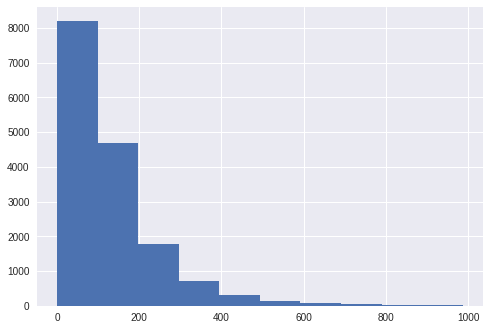

In [69]:
plt.hist(lens)

In [0]:
maxlen = 400

In [74]:
train_sequences

[[40,
  240,
  948,
  137,
  112,
  13,
  16,
  11,
  1,
  44,
  184,
  48,
  20,
  65,
  23,
  4,
  2154,
  36,
  59,
  549,
  7,
  260,
  9,
  2724,
  1149,
  12,
  259,
  39,
  190,
  5,
  89,
  1997,
  1374,
  18,
  457,
  2,
  5,
  3561,
  4,
  42,
  5756,
  111,
  92,
  3,
  112,
  13,
  121,
  201,
  3500,
  53,
  640,
  375,
  686,
  12,
  12,
  375,
  686,
  12,
  1550,
  5,
  4173,
  1998,
  110,
  1040,
  7344,
  20,
  6413],
 [15,
  26,
  745,
  2,
  27,
  497,
  1434,
  7,
  1403,
  1362,
  66,
  134,
  42,
  1321,
  12,
  259,
  78,
  1,
  2029,
  2,
  4708,
  1403,
  2,
  238,
  26,
  703,
  8,
  6,
  1,
  8759,
  28,
  25,
  16,
  980,
  17,
  15,
  26,
  442,
  631,
  1,
  564,
  230,
  6,
  310,
  2,
  472,
  620,
  304,
  2246,
  12,
  259,
  23,
  444,
  42,
  552,
  48,
  170,
  1076,
  1,
  783],
 [3,
  23,
  71,
  1528,
  150,
  4,
  1442,
  5757,
  150,
  1,
  1041,
  56,
  1217,
  1794,
  3,
  23,
  584,
  10,
  134,
  4,
  527,
  111,
  1746,
  2,
  1794,
  72

In [0]:
x_train = pad_sequences(train_sequences, maxlen= maxlen)

In [72]:
x_train

array([[   0,    0,    0, ..., 7344,   20, 6413],
       [   0,    0,    0, ..., 1076,    1,  783],
       [   0,    0,    0, ...,  214,   18,   34],
       ...,
       [   0,    0,    0, ...,   48,    7, 4439],
       [   0,    0,    0, ...,   13,   20,   57],
       [   0,    0,    0, ...,  463, 2985,  779]], dtype=int32)

In [75]:
x_train.shape

(16000, 400)

In [0]:
x_valid = pad_sequences(vaild_sequences, maxlen= maxlen)

In [79]:
x_valid

array([[   0,    0,    0, ...,    2,   49,   30],
       [   0,    0,    0, ...,   34,  357, 1026],
       [   0,    0,    0, ...,   98,   39,  657],
       ...,
       [   0,    0,    0, ...,    4,  120,   55],
       [   0,    0,    0, ...,    6, 6586,  115],
       [   0,    0,    0, ...,   11,  440, 1308]], dtype=int32)

In [80]:
x_valid.shape

(4000, 400)

In [89]:
x_test = pad_sequences(test_sequences, maxlen= maxlen)
x_test
x_test.shape

(2000, 400)

In [93]:
x_test

array([[  0,   0,   0, ..., 299, 591,  28],
       [  0,   0,   0, ...,  13,  28, 107],
       [  0,   0,   0, ...,   2, 161,  51],
       ...,
       [  0,   0,   0, ..., 128,   9,  34],
       [714,   7, 528, ...,  37,   4, 907],
       [  0,   0,   0, ...,  28,  73, 644]], dtype=int32)

In [0]:
y_train = train.sentiment
y_valid = valid.sentiment
y_test = test.sentiment

In [0]:
import spacy

In [87]:
spacy.cli.download("en_core_web_lg")


    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_lg -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_lg

    You can now load the model via spacy.load('en_core_web_lg')



In [0]:
nlp = spacy.load("en_core_web_lg")

In [98]:
#shape 300
nlp.vocab["the"].vector

array([ 2.7204e-01, -6.2030e-02, -1.8840e-01,  2.3225e-02, -1.8158e-02,
        6.7192e-03, -1.3877e-01,  1.7708e-01,  1.7709e-01,  2.5882e+00,
       -3.5179e-01, -1.7312e-01,  4.3285e-01, -1.0708e-01,  1.5006e-01,
       -1.9982e-01, -1.9093e-01,  1.1871e+00, -1.6207e-01, -2.3538e-01,
        3.6640e-03, -1.9156e-01, -8.5662e-02,  3.9199e-02, -6.6449e-02,
       -4.2090e-02, -1.9122e-01,  1.1679e-02, -3.7138e-01,  2.1886e-01,
        1.1423e-03,  4.3190e-01, -1.4205e-01,  3.8059e-01,  3.0654e-01,
        2.0167e-02, -1.8316e-01, -6.5186e-03, -8.0549e-03, -1.2063e-01,
        2.7507e-02,  2.9839e-01, -2.2896e-01, -2.2882e-01,  1.4671e-01,
       -7.6301e-02, -1.2680e-01, -6.6651e-03, -5.2795e-02,  1.4258e-01,
        1.5610e-01,  5.5510e-02, -1.6149e-01,  9.6290e-02, -7.6533e-02,
       -4.9971e-02, -1.0195e-02, -4.7641e-02, -1.6679e-01, -2.3940e-01,
        5.0141e-03, -4.9175e-02,  1.3338e-02,  4.1923e-01, -1.0104e-01,
        1.5111e-02, -7.7706e-02, -1.3471e-01,  1.1900e-01,  1.08

In [99]:
nlp.vocab["and"].vector



array([-1.8567e-01,  6.6008e-02, -2.5209e-01, -1.1725e-01,  2.6513e-01,
        6.4908e-02,  1.2291e-01, -9.3979e-02,  2.4321e-02,  2.4926e+00,
       -1.7916e-02, -7.1218e-02, -2.4782e-01, -2.6237e-01, -2.2460e-01,
       -2.1961e-01, -1.2927e-01,  1.0867e+00, -6.6072e-01, -3.1617e-02,
       -5.7328e-02,  5.6903e-02, -2.7939e-01, -3.9825e-01,  1.4251e-01,
       -8.5146e-02, -1.4779e-01,  5.5067e-02, -2.8687e-03, -2.0917e-01,
       -7.0735e-02,  2.2577e-01, -1.5881e-01, -1.0395e-01,  9.7110e-02,
       -5.6251e-01, -3.2929e-01, -2.0853e-01,  9.8711e-03,  4.9777e-02,
        1.4883e-03,  1.5884e-01,  4.2771e-02, -2.6956e-03, -2.4620e-02,
       -1.9213e-01, -2.2556e-01,  1.0838e-01,  9.0086e-02, -1.3291e-01,
        3.2559e-01, -1.7038e-01, -1.0990e-01, -2.3986e-01, -2.4289e-02,
        1.4656e-02, -2.3700e-01,  8.4828e-02, -3.5982e-01, -7.6746e-02,
        4.8909e-02,  1.1431e-01, -2.1013e-01,  2.4765e-01, -1.7531e-02,
       -1.4028e-01,  4.6191e-02,  2.2972e-01,  1.1750e-01,  1.27

(array([  3.,   9., 140., 133.,  13.,   0.,   1.,   0.,   0.,   1.]),
 array([-1.12409997, -0.75286996, -0.38163996, -0.01040995,  0.36082006,
         0.73205006,  1.10328007,  1.47451007,  1.84574008,  2.21697009,
         2.58820009]),
 <a list of 10 Patch objects>)

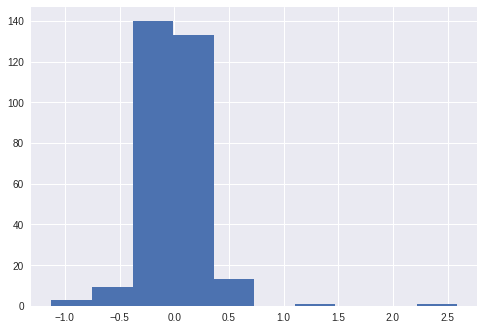

In [101]:
plt.hist(nlp.vocab["the"].vector)

(array([ 12., 100., 156.,  29.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([-0.71231002, -0.39181902, -0.07132802,  0.24916298,  0.56965398,
         0.89014497,  1.21063597,  1.53112697,  1.85161797,  2.17210897,
         2.49259996]),
 <a list of 10 Patch objects>)

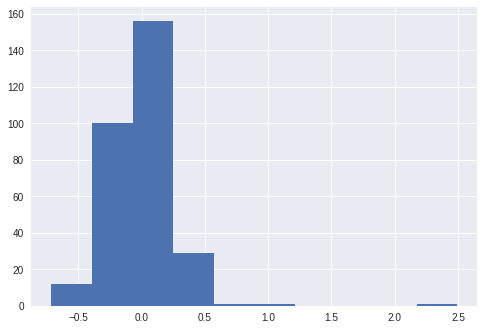

In [102]:
plt.hist(nlp.vocab["and"].vector)

In [0]:
embedding_dim = nlp.vocab.vectors_length

In [106]:
embedding_dim

300

In [111]:
nlp.vocab["you're"].vector

array([ 0.56767  , -0.062915 , -0.5527   ,  0.20808  ,  0.76667  ,
       -0.33901  , -0.59938  ,  0.040888 , -0.32349  , -0.9363   ,
       -0.1223   , -0.078781 ,  0.0023124, -0.0053164,  0.63593  ,
       -0.7781   ,  0.24667  , -1.5936   , -0.3744   , -0.035846 ,
        0.31343  ,  0.12871  , -0.26824  ,  0.84895  , -0.23236  ,
        0.32443  ,  0.34335  ,  0.037217 ,  0.51691  , -0.32046  ,
        0.11199  , -0.62312  ,  0.86988  , -0.34077  , -0.53392  ,
        0.0083001, -0.01173  , -0.33437  , -0.010093 ,  0.13465  ,
       -0.27184  ,  0.73015  , -0.89824  , -0.11176  , -0.15691  ,
        0.4852   , -0.22805  , -1.4438   , -0.23564  ,  0.6219   ,
       -0.50821  , -0.3406   ,  0.46742  , -0.79686  ,  0.43102  ,
       -0.4575   ,  0.22786  , -1.2585   , -0.36702  ,  0.17894  ,
       -0.063134 , -0.31222  , -0.88785  , -0.55294  , -0.10403  ,
       -0.022094 ,  0.080045 , -0.13069  , -0.20033  , -0.18031  ,
       -0.50601  ,  0.1914   , -0.7334   ,  0.023139 , -0.0815

In [114]:
nlp.vocab["nlst"].vector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [112]:
list(tokenizer.index_word.items())[:20]

[(1, 'the'),
 (2, 'and'),
 (3, 'i'),
 (4, 'to'),
 (5, 'a'),
 (6, 'was'),
 (7, 'of'),
 (8, 'it'),
 (9, 'for'),
 (10, 'in'),
 (11, 'is'),
 (12, 'n'),
 (13, 'that'),
 (14, 'my'),
 (15, 'we'),
 (16, 'this'),
 (17, 'but'),
 (18, 'with'),
 (19, 'they'),
 (20, 'you')]

In [113]:
list(tokenizer.index_word.items())[9950:10000]

[(9951, 'hostile'),
 (9952, 'salvage'),
 (9953, '41'),
 (9954, 'appliance'),
 (9955, 'critics'),
 (9956, 'curtain'),
 (9957, 'unimpressive'),
 (9958, 'unfair'),
 (9959, 'misery'),
 (9960, 'strolling'),
 (9961, 'oral'),
 (9962, 'deduct'),
 (9963, 'smattering'),
 (9964, 'daylight'),
 (9965, 'famished'),
 (9966, 'yorker'),
 (9967, "sally's"),
 (9968, 'understandably'),
 (9969, 'livingsocial'),
 (9970, 'elaborate'),
 (9971, 'cruiser'),
 (9972, 'collard'),
 (9973, 'carmel'),
 (9974, 'engineering'),
 (9975, 'nsushi'),
 (9976, 'blessed'),
 (9977, 'rewarded'),
 (9978, 'firehouse'),
 (9979, 'fitted'),
 (9980, 'underwear'),
 (9981, 'vacuuming'),
 (9982, "danny's"),
 (9983, "joey's"),
 (9984, 'npad'),
 (9985, 'lurking'),
 (9986, 'lana'),
 (9987, 'existant'),
 (9988, 'n1st'),
 (9989, 'n2nd'),
 (9990, 'pencil'),
 (9991, 'rust'),
 (9992, 'dreaded'),
 (9993, 'cultures'),
 (9994, 'wiping'),
 (9995, 'sundaes'),
 (9996, 'fur'),
 (9997, 'pureed'),
 (9998, 'stretched'),
 (9999, 'conveyor'),
 (10000, 'wrig

In [0]:
embedding_matrix = np.random.rand(num_words + 1, embedding_dim)

In [117]:
embedding_matrix.shape

(10001, 300)

(array([31., 28., 32., 30., 35., 34., 28., 26., 33., 23.]),
 array([6.85709128e-04, 1.00156235e-01, 1.99626761e-01, 2.99097287e-01,
        3.98567813e-01, 4.98038339e-01, 5.97508864e-01, 6.96979390e-01,
        7.96449916e-01, 8.95920442e-01, 9.95390968e-01]),
 <a list of 10 Patch objects>)

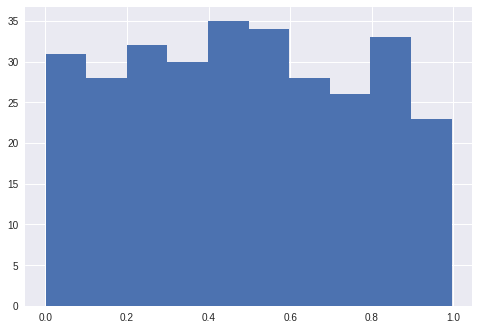

In [118]:
plt.hist(embedding_matrix[0])

(array([34., 29., 29., 29., 28., 42., 32., 21., 27., 29.]),
 array([0.00128025, 0.10088   , 0.20047975, 0.3000795 , 0.39967925,
        0.499279  , 0.59887875, 0.6984785 , 0.79807825, 0.897678  ,
        0.99727775]),
 <a list of 10 Patch objects>)

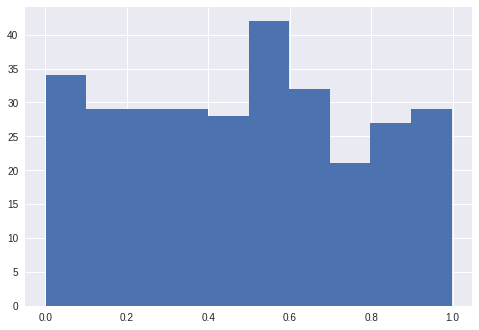

In [120]:
plt.hist(embedding_matrix[3])

(array([29., 28., 29., 34., 23., 29., 32., 29., 36., 31.]),
 array([0.00174428, 0.10151841, 0.20129255, 0.30106668, 0.40084081,
        0.50061494, 0.60038908, 0.70016321, 0.79993734, 0.89971147,
        0.99948561]),
 <a list of 10 Patch objects>)

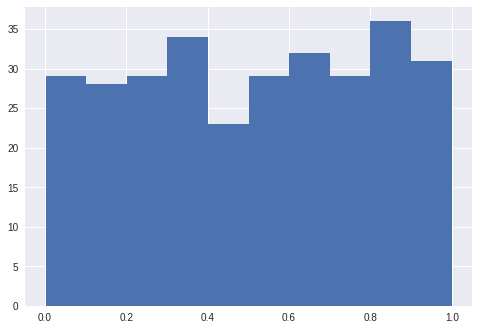

In [121]:
plt.hist(embedding_matrix[100])

([array([ 978.,  983.,  987., 1011.,  994., 1034., 1041.,  958., 1011.,
         1004.]),
  array([1008.,  977., 1020., 1052.,  990.,  994., 1036.,  972.,  964.,
          988.]),
  array([ 982., 1030.,  956., 1021., 1024.,  996.,  980., 1030.,  986.,
          996.]),
  array([1027., 1050., 1013., 1008., 1032.,  974., 1006.,  929.,  983.,
          979.]),
  array([1001., 1022., 1030., 1011.,  977.,  956.,  993.,  985., 1015.,
         1011.]),
  array([ 978., 1010., 1007.,  969., 1034., 1016.,  997., 1005., 1007.,
          978.]),
  array([ 992., 1017., 1023.,  964.,  992., 1042.,  978.,  965.,  997.,
         1031.]),
  array([1054.,  967.,  988.,  961., 1010., 1034.,  981., 1011.,  997.,
          998.]),
  array([1011.,  997., 1022.,  925., 1030., 1026., 1017., 1013.,  981.,
          979.]),
  array([1031.,  967., 1003.,  938.,  988.,  988., 1023., 1003., 1086.,
          974.]),
  array([1017., 1009., 1034., 1004.,  978., 1045.,  945., 1015.,  978.,
          976.]),
  array([1

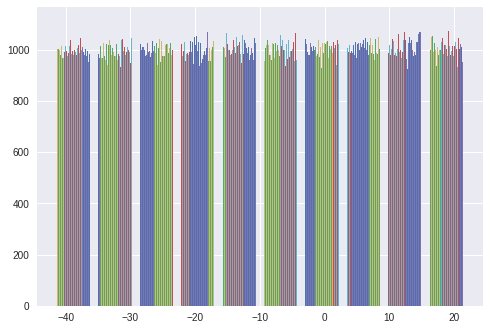

In [124]:
embedding_matrix = (embedding_matrix - 0.5) * 4
plt.hist(embedding_matrix)

(array([31., 28., 32., 30., 35., 34., 28., 26., 33., 23.]),
 array([-41.95611462, -35.59000096, -29.2238873 , -22.85777365,
        -16.49165999, -10.12554633,  -3.75943268,   2.60668098,
          8.97279464,  15.33890829,  21.70502195]),
 <a list of 10 Patch objects>)

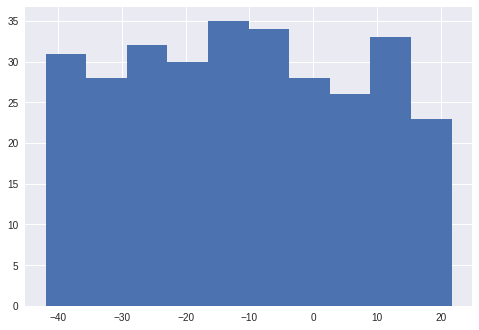

In [125]:
plt.hist(embedding_matrix[0])

In [0]:
for word, i in list(tokenizer.word_index.items())[: num_words]:
  try:
    embedding_vector = nlp.vocab[word].vector
    embedding_matrix[i] = embedding_vector
  except:
    pass

In [0]:
from keras.models import Sequential

In [0]:
from keras.layers import Embedding, Flatten, Dense,LSTM

In [0]:
units = 32

In [0]:
model = Sequential()

In [132]:
model.add(Embedding(num_words+1, embedding_dim))
model.add(LSTM(units))
model.add(Dense(1,activation = "sigmoid"))

Instructions for updating:
Colocations handled automatically by placer.


In [133]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 300)         3000300   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 3,042,957
Trainable params: 3,042,957
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.layers[0].set_weights([embedding_matrix])

In [0]:
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["acc"])

In [143]:
history = model.fit(x_train,y_train,epochs = 10, batch_size = 32, validation_data = (x_valid,y_valid))

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 196s 12ms/step - loss: 0.3770 - acc: 0.8327 - val_loss: 0.2815 - val_acc: 0.8902
Epoch 2/10
16000/16000 [==============================] - 194s 12ms/step - loss: 0.2114 - acc: 0.9180 - val_loss: 0.2633 - val_acc: 0.9062
Epoch 3/10
16000/16000 [==============================] - 195s 12ms/step - loss: 0.1529 - acc: 0.9439 - val_loss: 0.2143 - val_acc: 0.9195
Epoch 4/10
16000/16000 [==============================] - 197s 12ms/step - loss: 0.1103 - acc: 0.9606 - val_loss: 0.2382 - val_acc: 0.9183
Epoch 5/10
16000/16000 [==============================] - 196s 12ms/step - loss: 0.0820 - acc: 0.9714 - val_loss: 0.2410 - val_acc: 0.9163
Epoch 6/10
16000/16000 [==============================] - 197s 12ms/step - loss: 0.0588 - acc: 0.9803 - val_loss: 0.2885 - val_acc: 0.9117
Epoch 7/10
16000/16000 [==============================] - 195s 12ms/step - loss: 0.0429 - acc: 0.9861 - val_loss: 0.2